In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean

In [3]:
def stairs(ax, wmt, var, units="kg", **kwargs):
    da = wmt[var]
    coord = wmt[[c for c in wmt.coords if "l_target" in c][0]]
    coord_bounds = wmt[[c for c in wmt.coords if "i_target" in c][0]]
    l = ax.stairs(da, coord_bounds, **kwargs, orientation="horizontal")
    ax.set_xlabel(f"mean transformation rate [{units}]")
    return l

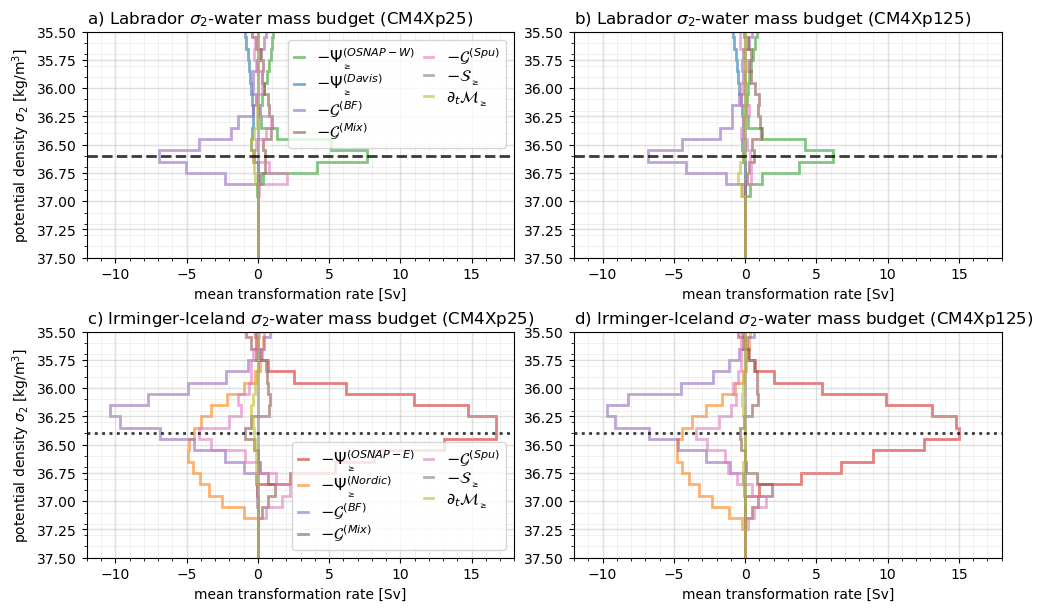

In [4]:
fig, axes = plt.subplot_mosaic([['upper left', 'upper right'],
                                ['lower left', 'lower right']],
                              figsize=(10, 6), layout="constrained")

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

for (col, model) in zip(["left", "right"], ["CM4Xp25", "CM4Xp125"]):
    wmt_west = xr.open_dataset(f"../../data/plotting_ready/wmb_OSNAP-west_{model}.nc")
    wmt_east = xr.open_dataset(f"../../data/plotting_ready/wmb_OSNAP-east_{model}.nc")
    wmt_mean = (wmt_east.drop_dims("sect") + wmt_west.drop_dims("sect"))
    
    kwargs = {"units":"Sv", "alpha":0.6, "lw":2}

    # West
    ax = axes[f"upper {col}"]
    stairs(ax,-wmt_west, 'convergent_mass_transport_OSNAP-W', label=r"$-\Psi^{(OSNAP-W)}_{_{\geq}}$", color="C2", **kwargs)
    stairs(ax,-wmt_west, 'convergent_mass_transport_Davis', label=r"$-\Psi^{(Davis)}_{_{\geq}}$", color="C0", **kwargs)
    stairs(ax, wmt_west, 'boundary_fluxes',           label=r"$-\mathcal{G}^{(BF)}$", color="C4", **kwargs)
    stairs(ax, wmt_west, 'diffusion',                 label=r"$-\mathcal{G}^{(Mix)}$", color="C5", **kwargs)
    stairs(ax, wmt_west, 'spurious_numerical_mixing', label=r"$-\mathcal{G}^{(Spu)}$", color="C6", **kwargs)
    stairs(ax,-wmt_west, 'mass_source',               label=r"$-\mathcal{S}_{_{\geq}}$", color="C7", **kwargs)
    stairs(ax, wmt_west, 'mass_tendency',             label=r"$\partial_{t} \mathcal{M}_{_{\geq}}$", color="C8", **kwargs)
    
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.grid(True, alpha=0.4, linewidth=1, which="major")
    ax.grid(True, alpha=0.2, linewidth=0.6, which="minor")
    if model=="CM4Xp25":
        ax.set_ylabel(r"potential density $\sigma_{2}$ [kg/m$^{3}$]");
        ax.legend(loc="upper right", handlelength=0.6, labelspacing=0.08, ncols=2, columnspacing=0.5, fontsize=11.5)
        panel="a)"
    else:
        ax.set_ylabel("")
        panel="b)"

    ax.set_title(rf"{panel} Labrador $\sigma_{{2}}$-water mass budget ({model})", loc="left")
    ax.set_ylim(37.5, 35.5);
    ax.set_xlim(-12, 18)

    # East
    ax = axes[f"lower {col}"]
    stairs(ax,-wmt_east, 'convergent_mass_transport_OSNAP-E', label=r"$-\Psi^{(OSNAP-E)}_{_{\geq}}$", color="C3", **kwargs)
    stairs(ax,-wmt_east, 'convergent_mass_transport_Nordic', label=r"$-\Psi^{(Nordic)}_{_{\geq}}$", color="C1", **kwargs)
    stairs(ax, wmt_east, 'boundary_fluxes',           label=r"$-\mathcal{G}^{(BF)}$", color="C4", **kwargs)
    stairs(ax, wmt_east, 'diffusion',                 label=r"$-\mathcal{G}^{(Mix)}$", color="C5", **kwargs)
    stairs(ax, wmt_east, 'spurious_numerical_mixing', label=r"$-\mathcal{G}^{(Spu)}$", color="C6", **kwargs)
    stairs(ax,-wmt_east, 'mass_source',               label=r"$-\mathcal{S}_{_{\geq}}$", color="C7", **kwargs)
    stairs(ax, wmt_east, 'mass_tendency',             label=r"$\partial_{t} \mathcal{M}_{_{\geq}}$", color="C8", **kwargs)
    
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    ax.grid(True, alpha=0.4, linewidth=1, which="major")
    ax.grid(True, alpha=0.2, linewidth=0.6, which="minor")

    wmt_map_west = xr.open_zarr(f"../../data/wmb_boundary_flux_maps_CM4Xp125_Labrador_2010-2014.zarr")
    wmt_map_east = xr.open_zarr(f"../../data/wmb_boundary_flux_maps_CM4Xp125_IrmingerIceland_2010-2014.zarr")
    axes["upper left"].axhline(wmt_map_west.sigma2_l_target.values, color="k", alpha=0.5, lw=2, ls="--")
    axes["upper right"].axhline(wmt_map_west.sigma2_l_target.values, color="k", alpha=0.5, lw=2, ls="--")
    axes["lower left"].axhline(wmt_map_east.sigma2_l_target.values, color="k", alpha=0.5, lw=2, ls=":")
    axes["lower right"].axhline(wmt_map_east.sigma2_l_target.values, color="k", alpha=0.5, lw=2, ls=":")
    
    if model=="CM4Xp25":
        ax.set_ylabel(r"potential density $\sigma_{2}$ [kg/m$^{3}$]");
        ax.legend(loc="lower right", handlelength=0.6, labelspacing=0.08, ncols=2, columnspacing=0.5, fontsize=11.5)
        panel="c)"
    else:
        ax.set_ylabel("")
        panel="d)"
    ax.set_title(rf"{panel} Irminger-Iceland $\sigma_{{2}}$-water mass budget ({model})", loc="left")
    ax.set_ylim(37.5, 35.5);
    ax.set_xlim(-12, 18)

/vftmp/Henri.Drake/pid2108170/ipykernel_2152063/2070680569.py:9: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(
/vftmp/Henri.Drake/pid2108170/ipykernel_2152063/2070680569.py:17: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  ax.pcolor(
/vftmp/Henri.Drake/pid2108170/ipykernel_2152063/2070680569.py:24: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  pc = ax.pcolor(
/vftmp/Henri.Drake/pid210817

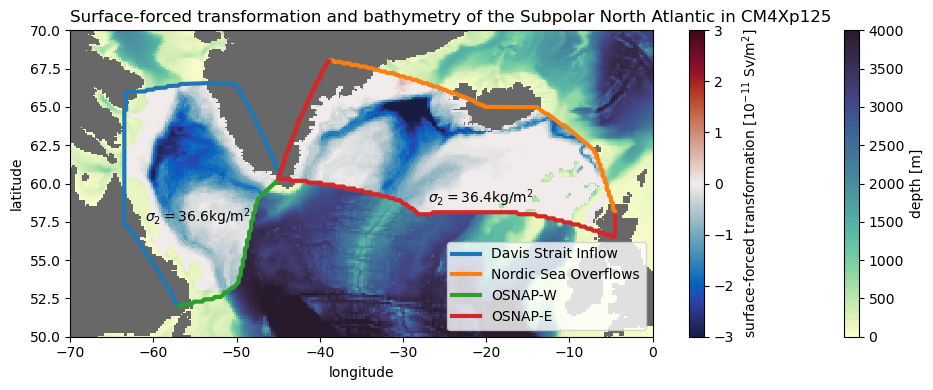

In [5]:
# Surface water mass transformation maps

fig, ax = plt.subplots(1,1, figsize=(10, 4))
model = "CM4Xp125"

toSv = 1e-6/1035.
swmt = xr.open_dataset("../../data/plotting_ready/swmt_OSNAP_CM4Xp125.nc").swmt

pc = ax.pcolor(
    wmt_east.geolon,
    wmt_east.geolat,
    wmt_east.deptho,
    cmap=cmocean.cm.deep,
    vmin=0, vmax=4000
)
plt.colorbar(pc, label="depth [m]")
ax.pcolor(
    wmt_east.geolon,
    wmt_east.geolat,
    wmt_east.deptho.where(wmt_east.deptho==0)+1.,
    cmap="Greys", vmin=0, vmax=1.5
)

pc = ax.pcolor(
    swmt['geolon'],
    swmt['geolat'],
    swmt,
    cmap=cmocean.cm.balance,
    vmin=-3,
    vmax=3
)
plt.colorbar(pc, label=r"surface-forced transformation [10$^{-11}$ Sv/m$^{2}$]")

ax.annotate(rf"$\sigma_{{2}} = ${wmt_map_west.sigma2_l_target.values}kg/m$^{{2}}$", xy=(-61, 57.5), xycoords="data")
ax.annotate(rf"$\sigma_{{2}} = ${wmt_map_east.sigma2_l_target.values}kg/m$^{{2}}$", xy=(-27, 58.75), xycoords="data")

sec_ranges = {
    "west": {
        "Davis Strait Inflow": np.arange(110, wmt_west.lon_sect.size),
        "OSNAP-W": np.arange(0, 110)
    },
    "east": {
        "Nordic Sea Overflows": np.arange(0, 224),
        "OSNAP-E": np.arange(224, wmt_east.lon_sect.size)
    }
}

def plot_section(sname):
    if sname in sec_ranges["west"]:
        sidx = sec_ranges["west"][sname]
        ax.plot(wmt_west.lon_sect[sidx], wmt_west.lat_sect[sidx], label=sname, lw=3)
    elif sname in sec_ranges["east"]:
        sidx = sec_ranges["east"][sname]
        ax.plot(wmt_east.lon_sect[sidx], wmt_east.lat_sect[sidx], label=sname, lw=3)
        
plot_section("Davis Strait Inflow")
plot_section("Nordic Sea Overflows")
plot_section("OSNAP-W")
plot_section("OSNAP-E")

ax.legend()
ax.set_xlabel("longitude");
ax.set_ylabel("latitude");
ax.set_xlim(-70, 0)
ax.set_ylim(50, 70);

ax.set_title("Surface-forced transformation and bathymetry of the Subpolar North Atlantic in CM4Xp125", loc="left")

plt.tight_layout()
fig.savefig("../../figures/SPNA_transformations_and_overturning.png", dpi=300, bbox_inches="tight")